# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [77]:
! git clone https://github.com/CarolWuuu/DS3001_visualization.git

Cloning into 'DS3001_visualization'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 48 (delta 3), reused 1 (delta 1), pack-reused 32
Receiving objects: 100% (48/48), 8.83 MiB | 9.68 MiB/s, done.
Resolving deltas: 100% (8/8), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
#1
college = pd.read_csv('/content/DS3001_visualization/assignment/data/college_completion.csv')

In [ ]:
#2
print("dimensions = ", college.shape)
print("observations = ", college.size)
print("variables = ", college.columns)
college.head()

In [169]:
#3
print(pd.crosstab(college['control'],college['level']),'\n')
print(pd.crosstab(college['control'],college['level'], normalize = 'all'),'\n')

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



Based on quantities, the most colleges are 4-year private not-for-profit. The second type is 2-year public college. The third is 4-year public college. Then it's 4-year private for-profit followed by 2-year private for-profit. 2-year private not-for-profit has the least number of colleges.

In [ ]:
#4
sns.histplot(college['grad_100_value'])

In [ ]:
sns.kdeplot(college['grad_100_value'])

In [ ]:
sns.boxplot(college['grad_100_value'])

In [ ]:
college['grad_100_value'].describe()

In [ ]:
#5
sns.kdeplot(data=college,x='grad_100_value',hue='level')

In [ ]:
college.loc[:,['level','grad_100_value']].groupby('level').describe()

Mean graduation rates for 4-year college is higher than that for 2-year college by 10 pecentage points.

In [ ]:
sns.kdeplot(data=college,x='grad_100_value',hue='control')

In [ ]:
college.loc[:,['control','grad_100_value']].groupby('control').describe()

Mean graduation rates for public is around 17%, for private not-for-profit is around 42%, for private for-profit is around 29%.
Therefore, 4-year and private not-for-profit colleges have the best graduation rates.

In [34]:
#6
college['levelXcontrol']=college['level']+', '+college['control']


In [ ]:
sns.kdeplot(data=college,x='grad_100_value',hue='levelXcontrol')

In [ ]:
#7
college.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe()

2-*year* private not-for-profit colleges have the highest mean graduation rates. The next highest type is 4-*year* private not-for-profit.


In [ ]:
#7
sns.kdeplot(data=college,x='aid_value',hue='level')

In [ ]:
sns.kdeplot(data=college,x='aid_value',hue='control')

In [ ]:
college.loc[:,['level','control','aid_value']].groupby(['level','control']).describe()

In [ ]:
college['aid_arcsinh'] = np.arcsinh(college['aid_value'])
sns.kdeplot(data=college,x='aid_arcsinh')

The peak around 9 correspond to public and FP colleges, as they gave similar amount of aid. NFP private colleges gave much more aid and are represented by the peak between 10 and 11.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

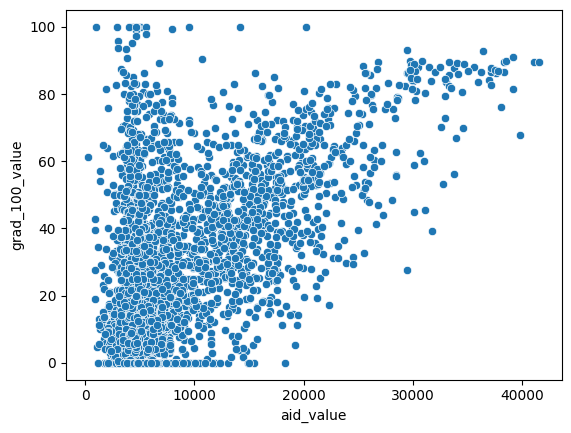

In [43]:
#8
sns.scatterplot(data=college,x='aid_value',y='grad_100_value')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

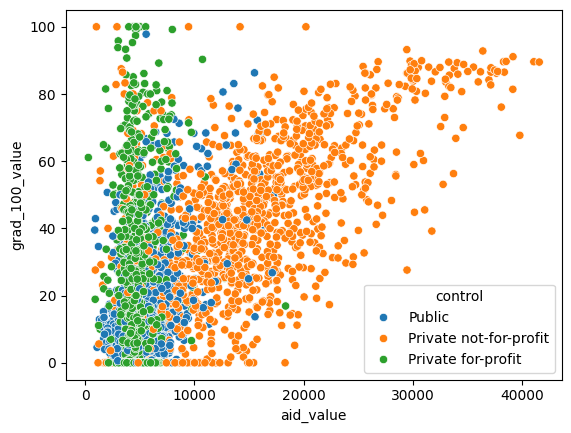

In [45]:
sns.scatterplot(data=college,x='aid_value',y='grad_100_value',hue='control')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

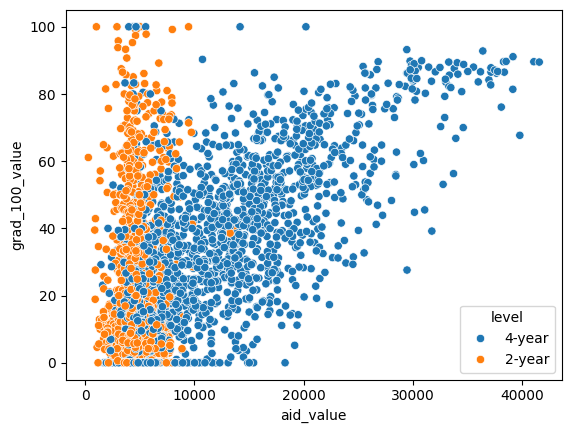

In [46]:
sns.scatterplot(data=college,x='aid_value',y='grad_100_value',hue='level')

Graduation rates of 4 year NFP colleges increase with the amount of aid they gave. The other type of collges' graduation rates vary a lot with little amount of aid given.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [58]:
airbnb = pd.read_csv('/content/DS3001_visualization/assignment/data/airbnb_hw.csv')
# Clean price variable:
price = airbnb['Price']
price = price.str.replace(',','') # Replace commas with nothing
price = pd.to_numeric(price,errors='coerce') # Typecast price to float/numeric
airbnb['Price'] = price
del price

In [51]:
#2
print("dimensions = ", airbnb.shape)
print("observations = ", airbnb.size)
print("variables = ", airbnb.columns)
airbnb.head()

dimensions =  (30478, 13)
observations =  396214
variables =  Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [55]:
#3
pd.crosstab(airbnb['Property Type'],airbnb['Room Type'])

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


Ignoring the rare novelty property type, the most common properties are apartment, B&B, Condominium, dorm, house, loft, and townhouse. Among the above, it is more common to rent private rooms for B&B and house than the entire property.

<Axes: xlabel='Price_log', ylabel='Density'>

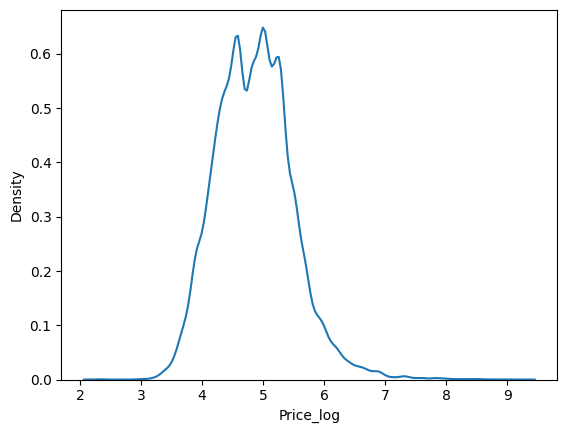

In [63]:
#4
airbnb['Price_log']=np.log(airbnb['Price'])
sns.kdeplot(airbnb['Price_log'])

<Axes: xlabel='Price_log', ylabel='Count'>

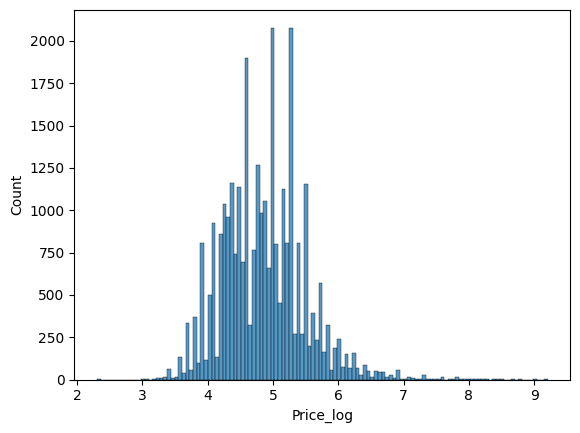

In [64]:
sns.histplot(airbnb['Price_log'])

<Axes: ylabel='Price_log'>

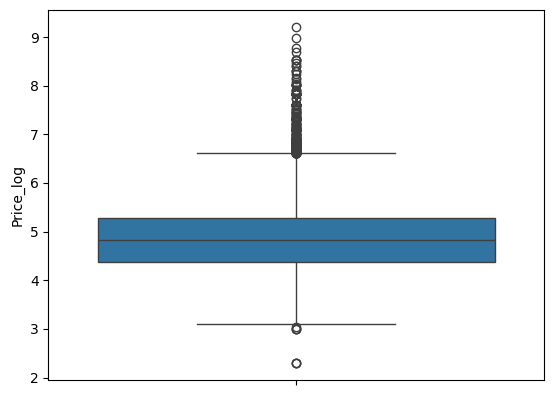

In [65]:
sns.boxplot(airbnb['Price_log'])

In [66]:
airbnb['Price_log'].describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64

<Axes: xlabel='Beds', ylabel='Price_log'>

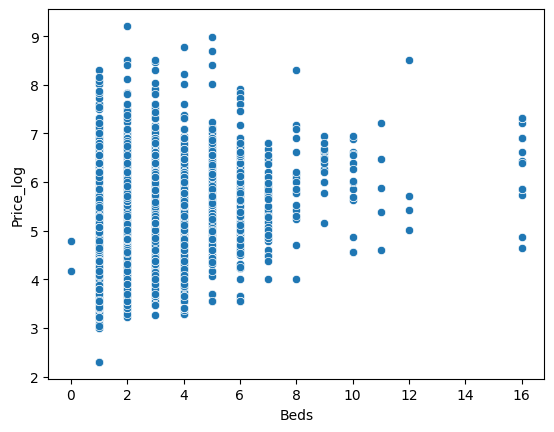

In [70]:
#5
sns.scatterplot(data=airbnb, y='Price_log',x='Beds')

In [69]:
airbnb.loc[:,['Price','Beds']].groupby('Beds').describe()

Price_log                                                              \
         count      mean       std       min       25%       50%       75%   
Beds                                                                         
0.0        2.0  4.476755  0.427613  4.174387  4.325571  4.476755  4.627939   
1.0    20344.0  4.686977  0.539666  2.302585  4.317488  4.605170  5.043425   
2.0     6610.0  5.094504  0.580425  3.218876  4.744932  5.075174  5.416100   
3.0     2071.0  5.340837  0.644742  3.258097  4.941642  5.298317  5.703782   
4.0      783.0  5.480463  0.721360  3.295837  5.010635  5.509388  5.926926   
5.0      284.0  5.669484  0.735623  3.555348  5.245705  5.669881  6.109248   
6.0      177.0  5.651790  0.824358  3.555348  5.293305  5.616771  6.052089   
7.0       45.0  5.617009  0.693481  4.007333  5.176150  5.703782  6.098074   
8.0       24.0  5.956200  0.862418  4.007333  5.495121  5.857933  6.176138   
9.0       15.0  6.341645  0.461176  5.164786  6.098011  6.476972  6.636468   
10.0      16.0  5.945514  0.762220  4.553877  5.673034  6.009872  6.559853   
11.0       5.0  5.913390  0.996967  4.605170  5.393628  5.883322  6.476972   
12.0       4.0  6.161928  1.595714  5.010635  5.314734  5.559941  6.407135   
16.0      13.0  6.312746  0.877963  4.644391  5.857933  6.437752  6.907755   

                
           max  
Beds            
0.0   4.779123  
1.0   8.294050  
2.0   9.210340  
3.0   8.517193  
4.0   8.779557  
5.0   8.987197  
6.0   7.919356  
7.0   6.802395  
8.0   8.294050  
9.0   6.956545  
10.0  6.956545  
11.0  7.207860  
12.0  8.517193  
16.0  7.313220

As number of beds goes up, the mean of price also goes up.

<Axes: xlabel='Beds', ylabel='Price_log'>

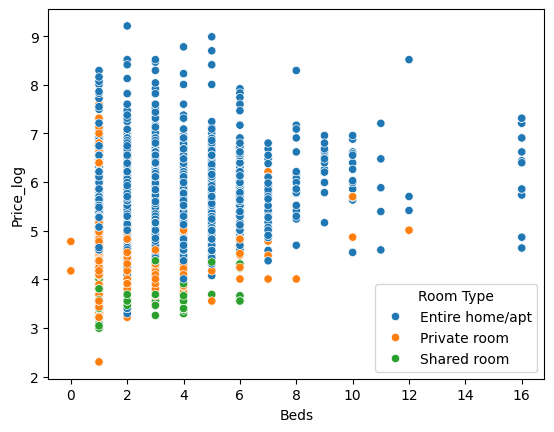

In [71]:
#6
sns.scatterplot(data=airbnb, x='Beds', y='Price_log',hue='Room Type')

In [72]:
airbnb.loc[:,['Price','Room Type']].groupby('Room Type').describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

<Axes: xlabel='Beds', ylabel='Price_log'>

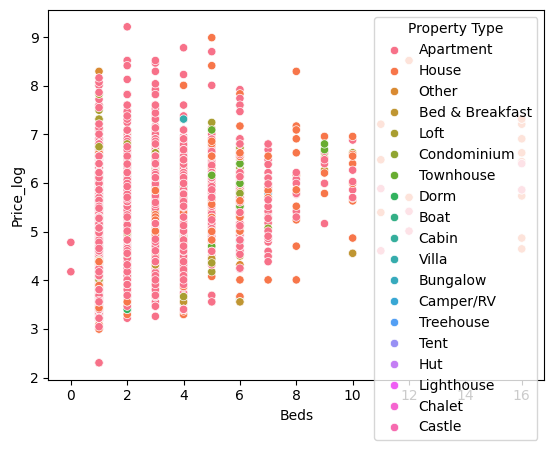

In [73]:
sns.scatterplot(data=airbnb, x='Beds', y='Price_log',hue='Property Type')

In [74]:
airbnb.loc[:,['Price','Property Type']].groupby('Property Type').describe()

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0

Entire house/apt and Villa have the highest prices on average and the highest standard deviation.
The median appear to be a more reliable estimate of central tendency because some of the outliers (max) can skewed the mean.

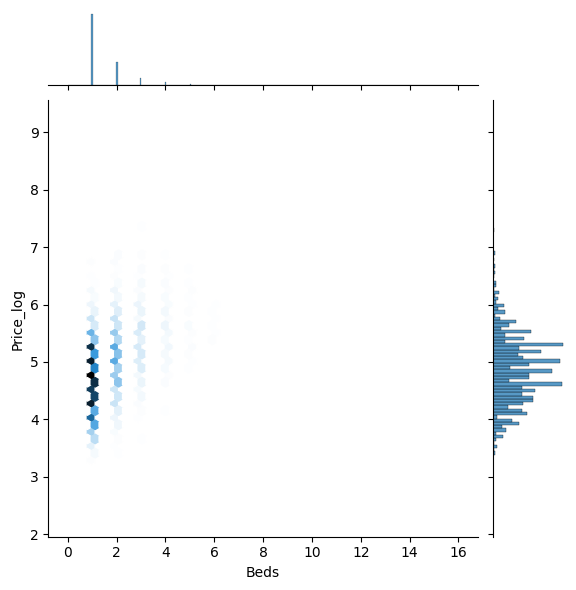

In [76]:
#7
sns.jointplot(data=airbnb,x='Beds',y='Price_log',kind='hex')

Vast majority of the airbnb rent 1-2 beds, and most airbnb fall in the price range of 4-6 log points.

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [78]:
df = pd.read_csv('/content/DS3001_visualization/assignment/data/Affiliated_Entity_Performance_Jan_2024.csv')

In [152]:
print(df.isna().sum())

Affiliated entity                                                                                                       0
Affiliated entity ID                                                                                                    1
Number of facilities                                                                                                    0
Number of states and territories with operations                                                                        0
Number of Special Focus Facilities (SFF)                                                                                0
Number of SFF candidates                                                                                                0
Number of facilities with an abuse icon                                                                                 0
Percentage of facilities with an abuse icon                                                                             0
Percent of facilities cl

I picked Nursing Home Affiliated Entity Performance Measures January 2024 dataset.

The data dictionary doesn't document how missings are handled for either of the categorical variables or numeric variables. Since there are missing values in several numeric variables, the data dictrionary should be more attentive on instructions of how to handle those missing values. In addition, variable name and term name are essentially the same but were split into two column which are repetitive.

I picked Number of Facilities, Percent of facilities classified as for profit, non profit, government owned, Average staffing rating, and Average total nurse hours per resident day to invesitgate the relationship between different types of facilities, nurse work hours and residents feedback.

<Axes: ylabel='Number of facilities'>

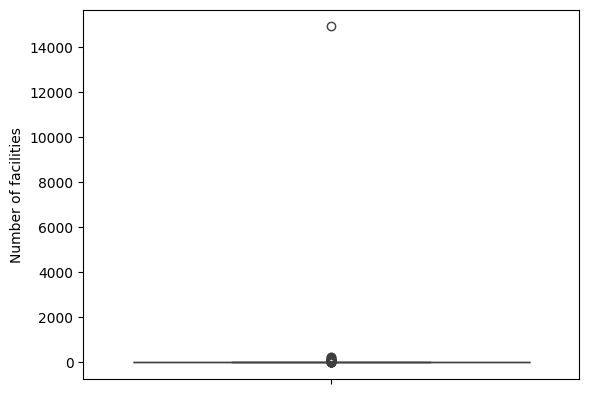

In [158]:
sns.boxplot(df['Number of facilities'])

There are extreme outliers in number of facilities. In addition, many outliers exist in Percent of facilities classified as for profit, non profit, government owned,and Average total nurse hours per resident day but not extreme so no log transformation is needed for those boxplots.
Average staffing rating has no outlier.

In [ ]:
df['Number of facilities log']=np.log(df['Number of facilities'])
sns.boxplot(df['Number of facilities log'])

<Axes: ylabel='Percent of facilities classified as for-profit'>

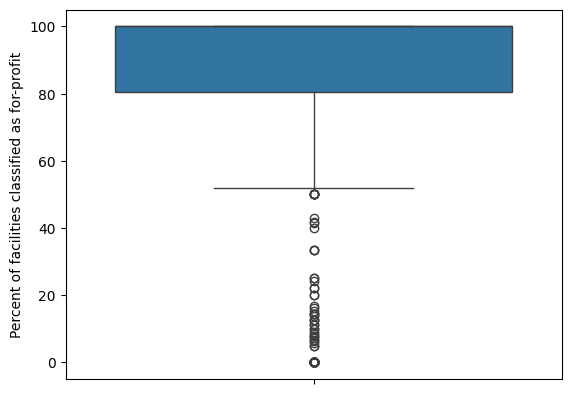

In [154]:
sns.boxplot(df['Percent of facilities classified as for-profit'])

<Axes: ylabel='Percent of facilities classified as non-profit'>

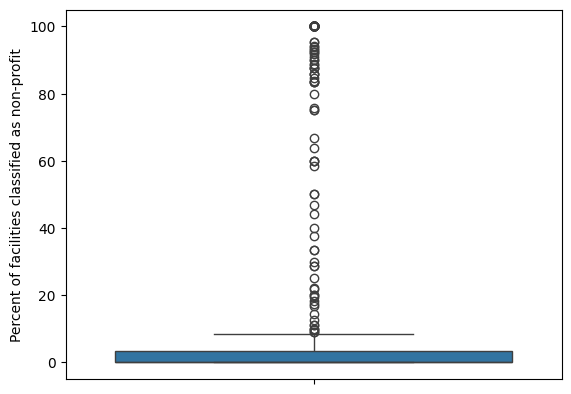

In [156]:
sns.boxplot(df['Percent of facilities classified as non-profit'])

<Axes: ylabel='Percent of facilities classified as government-owned'>

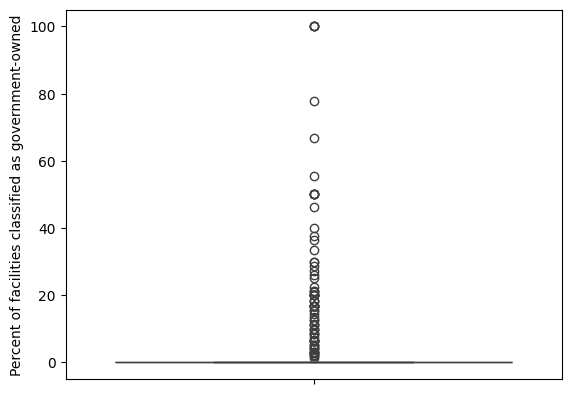

In [157]:
sns.boxplot(df['Percent of facilities classified as government-owned'])

<Axes: ylabel='Average staffing rating'>

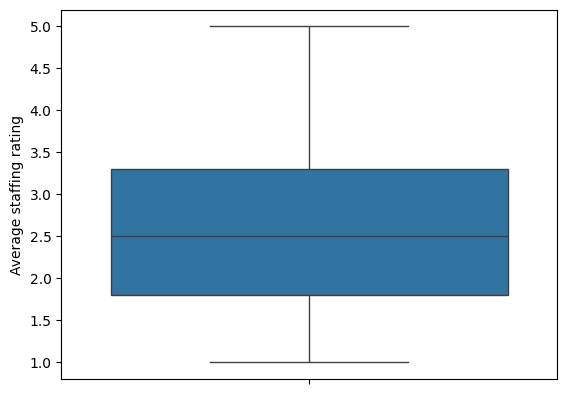

In [163]:
sns.boxplot(df['Average staffing rating'])

<Axes: ylabel='Average total nurse hours per resident day'>

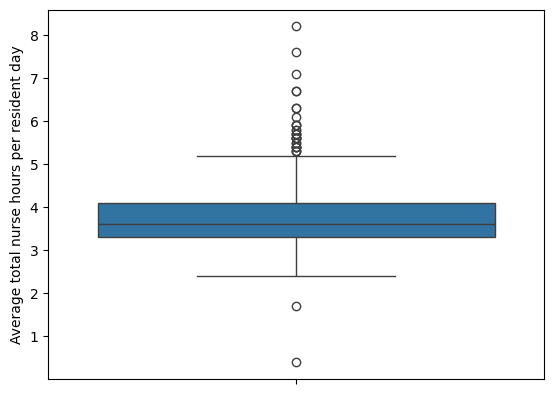

In [164]:
sns.boxplot(df['Average total nurse hours per resident day'])

Similarly, histogram and kernel density plot of Number of facilities are extremely skewed and require log transformation.

Most affliated entities have 0-6 log points of number of facilities. Most entites have bimodal distribution of number of FP and NP facilities under 20% and above 80%. Most entites have under 20 government-owned facilities.

<Axes: xlabel='Number of facilities log', ylabel='Count'>

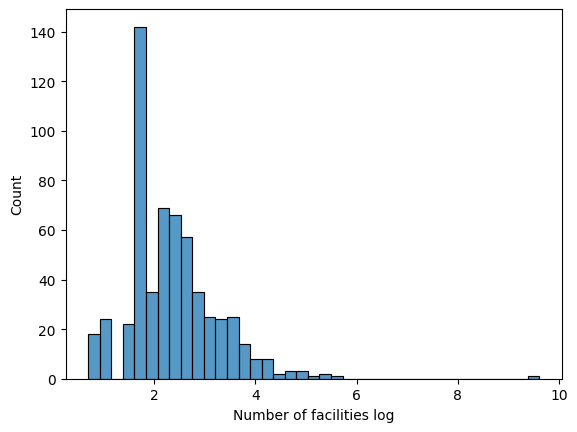

In [140]:
sns.histplot(df['Number of facilities log'])

<Axes: xlabel='Number of facilities log', ylabel='Density'>

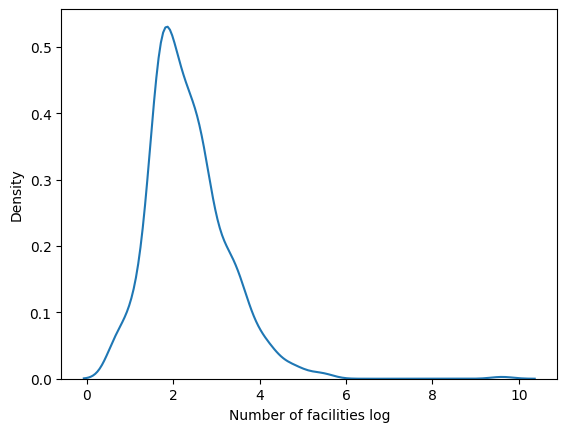

In [141]:
sns.kdeplot(df['Number of facilities log'])

<Axes: xlabel='Percent of facilities classified as for-profit', ylabel='Count'>

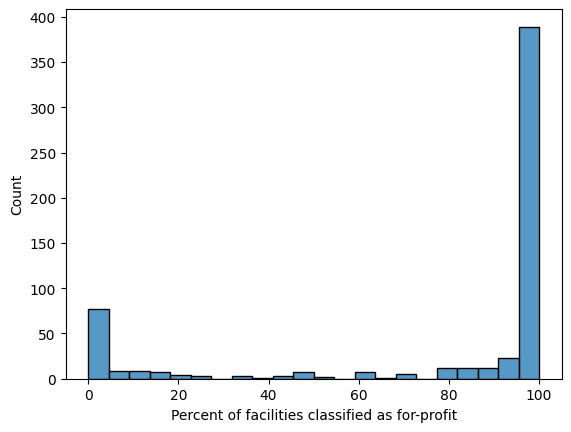

In [151]:
sns.histplot(df['Percent of facilities classified as for-profit'])

<Axes: xlabel='Percent of facilities classified as for-profit', ylabel='Density'>

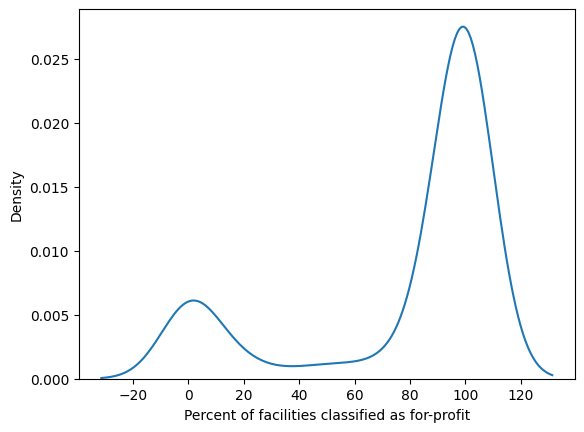

In [161]:
sns.kdeplot(df['Percent of facilities classified as for-profit'])

<Axes: xlabel='Percent of facilities classified as non-profit', ylabel='Count'>

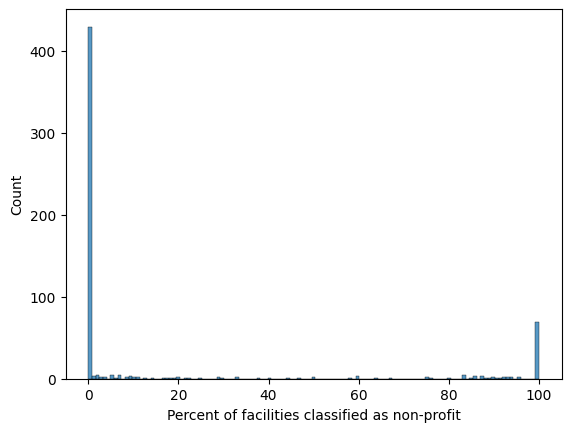

In [162]:
sns.histplot(df['Percent of facilities classified as non-profit'])

<Axes: xlabel='Percent of facilities classified as non-profit', ylabel='Density'>

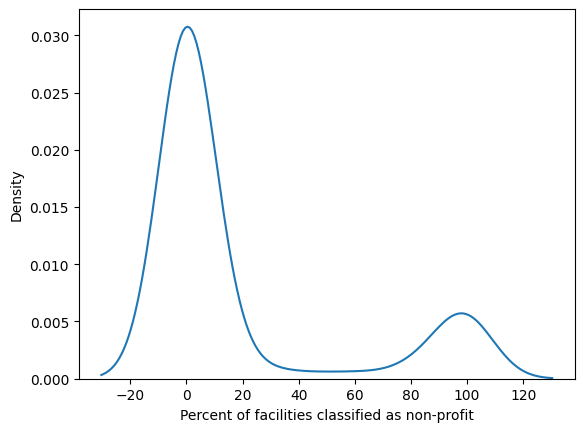

In [160]:
sns.kdeplot(df['Percent of facilities classified as non-profit'])

<Axes: xlabel='Percent of facilities classified as government-owned', ylabel='Count'>

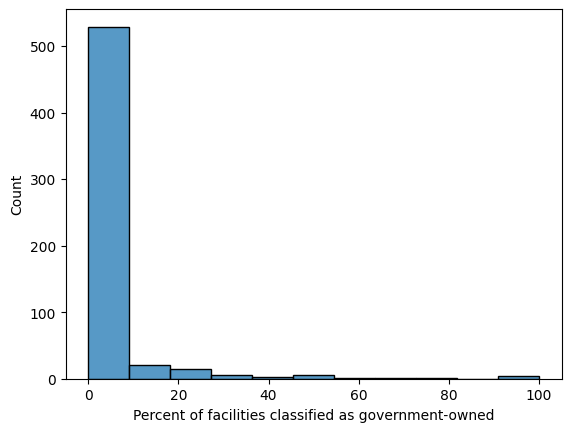

In [149]:
sns.histplot(df['Percent of facilities classified as government-owned'])

<Axes: xlabel='Percent of facilities classified as government-owned', ylabel='Density'>

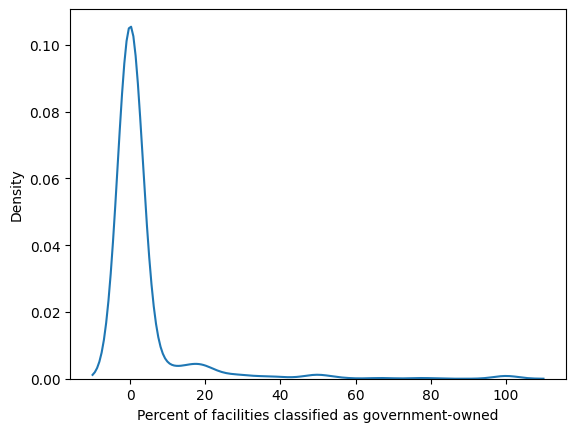

In [148]:
sns.kdeplot(df['Percent of facilities classified as government-owned'])

In [ ]:
sns.boxplot(df['Average staffing rating'])

In [ ]:
sns.kdeplot(df['Average staffing rating'])

In [ ]:
sns.histplot(df['Average total nurse hours per resident day'])

In [ ]:
sns.kdeplot(df['Average total nurse hours per resident day'])

<Axes: xlabel='Average total nurse hours per resident day', ylabel='Average staffing rating'>

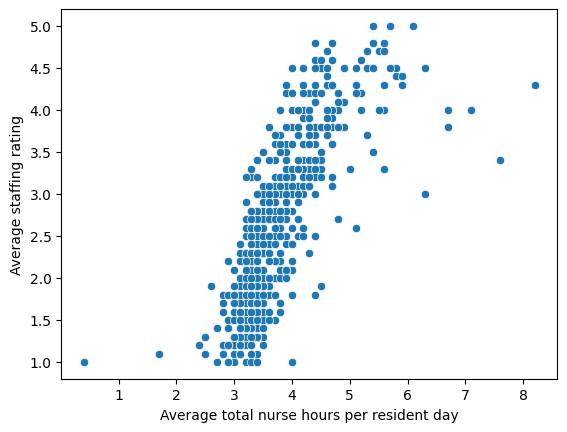

In [168]:
# scatterplot of Average total nurse hours per resident day vs. Average staffing rating
sns.scatterplot(data=df, x='Average total nurse hours per resident day',y='Average staffing rating')

As the average total nurse hours per resident day go up, the average staffing rating also go up. However, between 3-4 average total nurse hours per resident day, the average staffing rating varies a lot.

In [172]:
df_s = df[['Percent of facilities classified as for-profit','Percent of facilities classified as non-profit','Percent of facilities classified as government-owned','Average total nurse hours per resident day']]
df_s.cov()

,Percent of facilities classified as for-profit,Percent of facilities classified as non-profit,Percent of facilities classified as government-owned,Average total nurse hours per resident day
Percent of facilities classified as for-profit,1392.378125,-1280.536678,-111.858253,-7.427839
Percent of facilities classified as non-profit,-1280.536678,1309.664340,-29.120035,7.640065
Percent of facilities classified as government-owned,-111.858253,-29.120035,140.987568,-0.212592
Average total nurse hours per resident day,-7.427839,7.640065,-0.212592,0.552730
